Dataset preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing values in dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


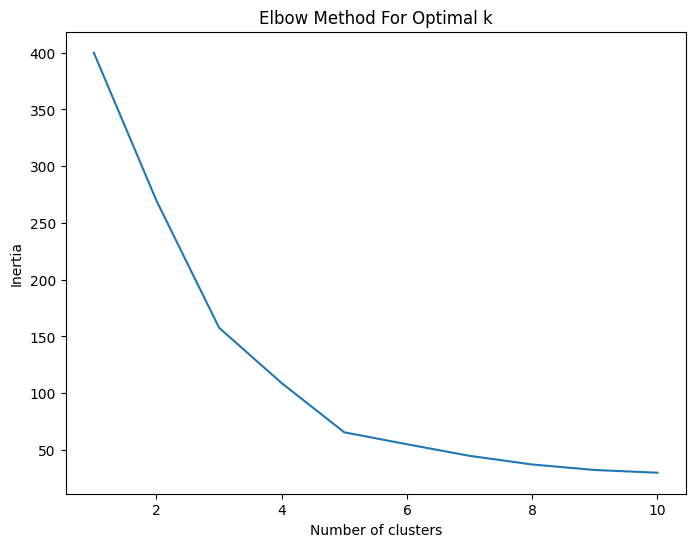


Dataset with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


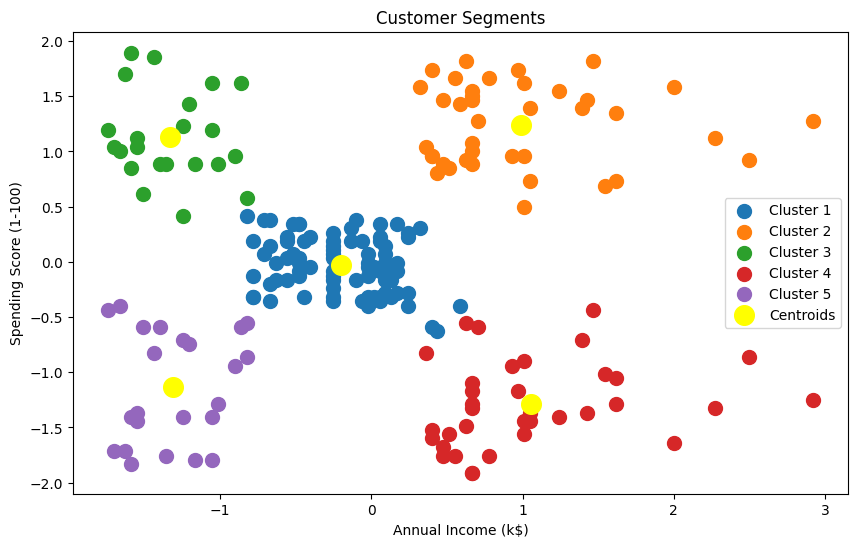


Cluster Summary (Average values per cluster):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the customer segmentation dataset manually
# Change the path to the location where you have downloaded the 'customer.csv' file
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset to understand its structure
print("Dataset preview:")
print(df.head())

# Step 2: Data Preprocessing
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

# Drop rows with missing values (you can also fill missing values if you prefer)
df = df.dropna()  

# Select relevant features: 'Annual Income (k$)' and 'Spending Score (1-100)' are used for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means Clustering
# Use the Elbow Method to determine the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the plot, assume that the optimal number of clusters is 5 (you can adjust this based on the plot)
optimal_k = 5

# Apply K-means with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Display the first few rows of the dataframe with cluster labels
print("\nDataset with cluster labels:")
print(df.head())

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

# Set titles and labels
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 5: Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the summary of each cluster
print("\nCluster Summary (Average values per cluster):")
print(cluster_summary)
